In [1]:
# Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

C:\Users\faruk\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('data/ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [10]:
 # Numeric and catogorical features 
 num_features = df.select_dtypes(exclude="object").columns
 cat_features = df.select_dtypes(include="object").columns

In [11]:
cat_features

Index(['model', 'transmission', 'fuelType'], dtype='object')

In [12]:
encoder = LabelEncoder()

In [13]:
df['modle_encoded'] = encoder.fit_transform(df['model'])
df['transmission_encoded'] = encoder.fit_transform(df['transmission'])
df['fuelType_encoded'] = encoder.fit_transform(df['fuelType'])

df = df.drop(columns=['model', 'transmission', 'fuelType'])

df.head()

,year,price,mileage,tax,mpg,engineSize,modle_encoded,transmission_encoded,fuelType_encoded
0,2017,12000,15944,150,57.7,1.0,5,0,4
1,2018,14000,9083,150,57.7,1.0,6,1,4
2,2017,13000,12456,150,57.7,1.0,6,1,4
3,2019,17500,10460,145,40.3,1.5,5,1,4
4,2019,16500,1482,145,48.7,1.0,5,0,4


In [14]:
X = df.drop('price', axis=1) 
y = df['price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [16]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
score = r2_score(y_test, y_pred)*100
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print("Coefficient of determination: %.2f" % score)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Coefficient of determination: 73.85
Mean Absolute Error (MAE): 1741.0828033719647
Mean Squared Error (MSE): 5803806.280230704
Root Mean Squared Error (RMSE): 2409.109022072414


In [19]:
prediction_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference / Residual':y_test-y_pred})
prediction_df

,Actual Value,Predicted Value,Difference / Residual
14796,22999,16602.800673,6396.199327
3068,13990,12737.690057,1252.309943
17886,15999,15224.150155,774.849845
2985,10500,9440.766260,1059.233740
4586,9995,9027.811834,967.188166
...,...,...,...
12885,9900,12622.495615,-2722.495615
5990,7995,10791.953789,-2796.953789
17461,8200,8887.561800,-687.561800
12855,18200,15812.828239,2387.171761


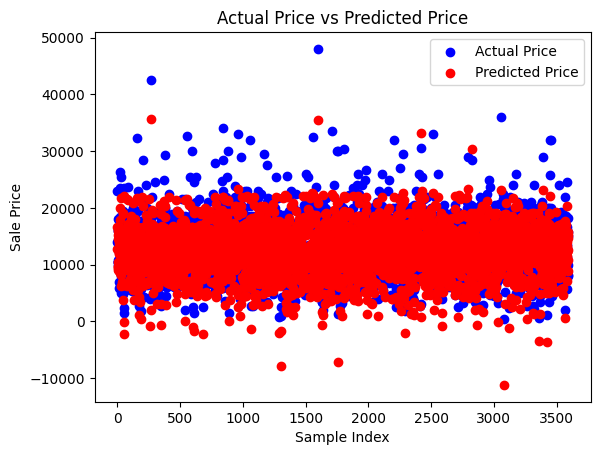

In [20]:
# Plotting the sale price
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Price')
# Plotting the predictions
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Price')

plt.title('Actual Price vs Predicted Price')
plt.xlabel('Sample Index')
plt.ylabel('Sale Price')
plt.legend()
plt.show()

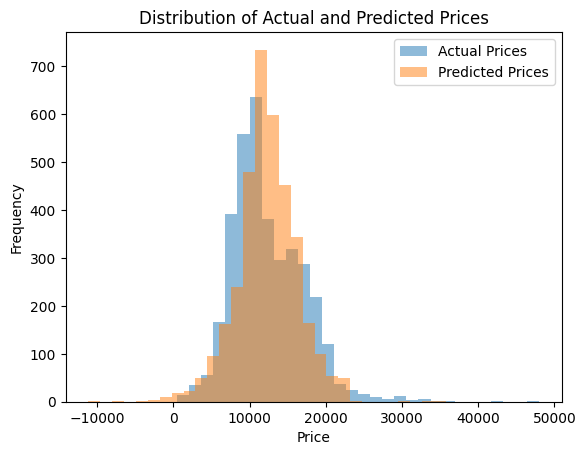

In [25]:
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Prices')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Prices')
plt.legend()
plt.show()

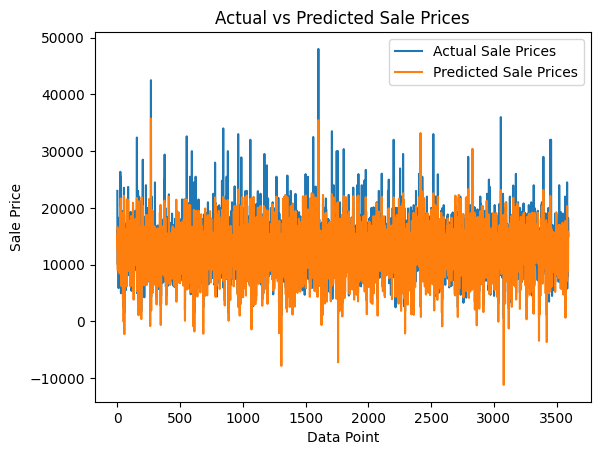

In [26]:
plt.plot(range(len(y_test)), y_test, label='Actual Sale Prices')
plt.plot(range(len(y_test)), y_pred, label='Predicted Sale Prices')
plt.xlabel('Data Point')
plt.ylabel('Sale Price')
plt.title('Actual vs Predicted Sale Prices')
plt.legend()
plt.show()

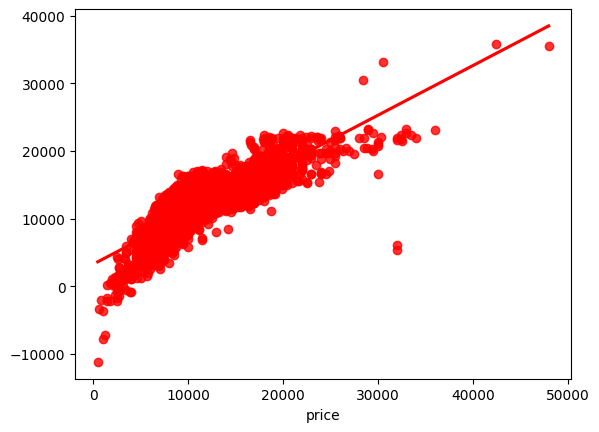

In [24]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

### hyperparameter tuning  GridSearchCV

https://www.geeksforgeeks.org/hyperparameter-tuning-in-linear-regression/

In [28]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [29]:
param_space = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
grid_search = GridSearchCV(regressor, param_space, cv=5)

grid_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best Score: 0.7301567696893756
